# More Pandas

* Merging Datasets
* Querying Datasets
* Parsing Dates
* Pivoting Datasets

In [2]:
# Load the necessary libraries
import pandas as pd
%matplotlib inline

## Merging Datasets

One of the tasks you will need to do for your final project, and in the wide world of data munging, is combining disparate datasets together into a single set. 

### Merging the same Data

Sometimes you have the same data, but it has been broken up over multiple files (over time or some other distinction). Ultimately what you want is a single dataframe that contains all the data from separate files (or dataframes). Let's load some data into three separate dataframes and then smoosh them together.

In [3]:
# Load the data for April, May, and June
april_url = "https://data.wprdc.org/datastore/dump/043af2a6-b58f-4a2e-ba5f-7ef868d3296b"
may_url = "https://data.wprdc.org/datastore/dump/487813ec-d7bc-4ff4-aa74-0334eb909142"
june_url = "https://data.wprdc.org/datastore/dump/d7fd722c-9980-4f7a-a7b1-d1a55a365697"

april_acj_data = pd.read_csv(april_url)
may_acj_data = pd.read_csv(may_url)
june_acj_data = pd.read_csv(june_url)

In [4]:
# inspect the dataframes
april_acj_data.head()

,_id,Date,Gender,Race,Age at Booking,Current Age
0,1,2018-04-01,M,B,23,24
1,2,2018-04-01,M,W,51,52
2,3,2018-04-01,M,B,31,32
3,4,2018-04-01,M,B,29,31
4,5,2018-04-01,M,W,28,29


In [5]:
# inspect the dataframes
may_acj_data.head()

,_id,Date,Gender,Race,Age at Booking,Current Age
0,1,2018-05-01,M,B,23,24
1,2,2018-05-01,M,B,20,21
2,3,2018-05-01,M,B,31,32
3,4,2018-05-01,M,B,25,27
4,5,2018-05-01,M,B,31,32


In [6]:
# inspect the dataframes
june_acj_data.head()

,_id,Date,Gender,Race,Age at Booking,Current Age
0,1,2018-06-01,M,B,20,21
1,2,2018-06-01,M,B,31,32
2,3,2018-06-01,M,B,25,27
3,4,2018-06-01,M,B,31,32
4,5,2018-06-01,M,W,32,33


As you can see, we have three dataframes with the Allegheny County Jail census for three months. All of the columns are the same so the merge will be relatively straightforward, we just have to concatinate the three dataframes together. Following the Pandas documentation on [Merging, joining, and concatinating object](https://pandas.pydata.org/pandas-docs/stable/merging.html#concatenating-objects), I will use the [`concat()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat) function to smoosh the three dataframes into a single dataframe.

In [7]:
# put the dataframes I want to smoosh together into a python list
monthly_dataframes = [april_acj_data, may_acj_data, june_acj_data]

# use the concat fuction to put them together into a new dataframe
ajc_data = pd.concat(monthly_dataframes)

# sample 5 random rows from the dataframe so I can (hopefully) see entries
# from each of the three months
ajc_data.sample(5)

,_id,Date,Gender,Race,Age at Booking,Current Age
6122,6123,2018-04-03,M,B,45,46
51736,51737,2018-06-22,M,W,33,33
17292,17293,2018-06-08,M,B,61,61
66791,66792,2018-04-28,M,W,31,32
49653,49654,2018-06-21,M,B,27,27


Use the `concat()` function to merge identical datasets together. But what if your data don't line up? What do you do then?

### Merging different data with overlapping columns

The [PGH 311 Data](https://data.wprdc.org/dataset/311-data) provides a good example for connecting datasets that don't line up, but are still connectable because they share columns. First, let's load up the 311 data.

In [ ]:
file_path = "

In [8]:
# Load the 311 data into a dataframe
url = "https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4"
pgh_311_data = pd.read_csv(url)
pgh_311_data.head()

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,231196,243428,2018-04-27T12:45:00,Potholes,Call Center,1,DPW - Street Maintenance,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-15,-79.919031,40.420954,EXACT
1,52377,175763,2017-08-02T11:02:00,Request New Sign,Call Center,1,DOMI - Traffic,Mount Washington,2.0,19.0,4.200319e+10,5.0,19.0,3.0,4-27,-80.011015,40.423107,EXACT
2,60368,175774,2017-08-02T11:17:00,Question,Text Message,1,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUT_OF_BOUNDS
3,231207,243439,2018-04-27T13:02:00,Potholes,Call Center,1,DPW - Street Maintenance,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,-79.994774,40.394449,EXACT
4,231028,243261,2018-04-27T08:12:00,Potholes,Call Center,1,DPW - Street Maintenance,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-12,-79.981038,40.403153,EXACT


Now one of the things I like to do with the 311 data is count requests by type. 

In [9]:
# count all the unique values in the column REQUEST_TYPE
pgh_311_data['REQUEST_TYPE'].value_counts()

Potholes                                39036
Weeds/Debris                            25797
Building Maintenance                    11638
Abandoned Vehicle (parked on street)     6941
Refuse Violations                        6307
Snow/Ice removal                         5704
Missed Pick Up                           5518
Overgrowth                               5390
Litter                                   5141
Replace/Repair a Sign                    4941
City Source (CDBG)                       4936
Street Light - Repair                    4660
Building Without a Permit                4620
Illegal Parking                          4551
Paving Request                           3887
Pruning (city tree)                      3870
Referral                                 3283
Vacant Building                          3122
Rodent control                           2889
Request New Sign                         2634
Sinkhole                                 2610
Catch Basin, Clogged              

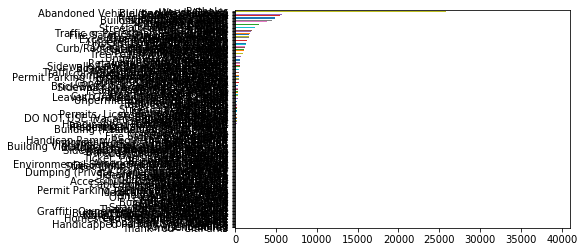

In [10]:
# make a HUGE horizontal bar chart so we can see the distribution of 311 complaints
# it took me a bunch of guesses to figure out the right figure size
pgh_311_data['REQUEST_TYPE'].value_counts(ascending=True).plot.barh()

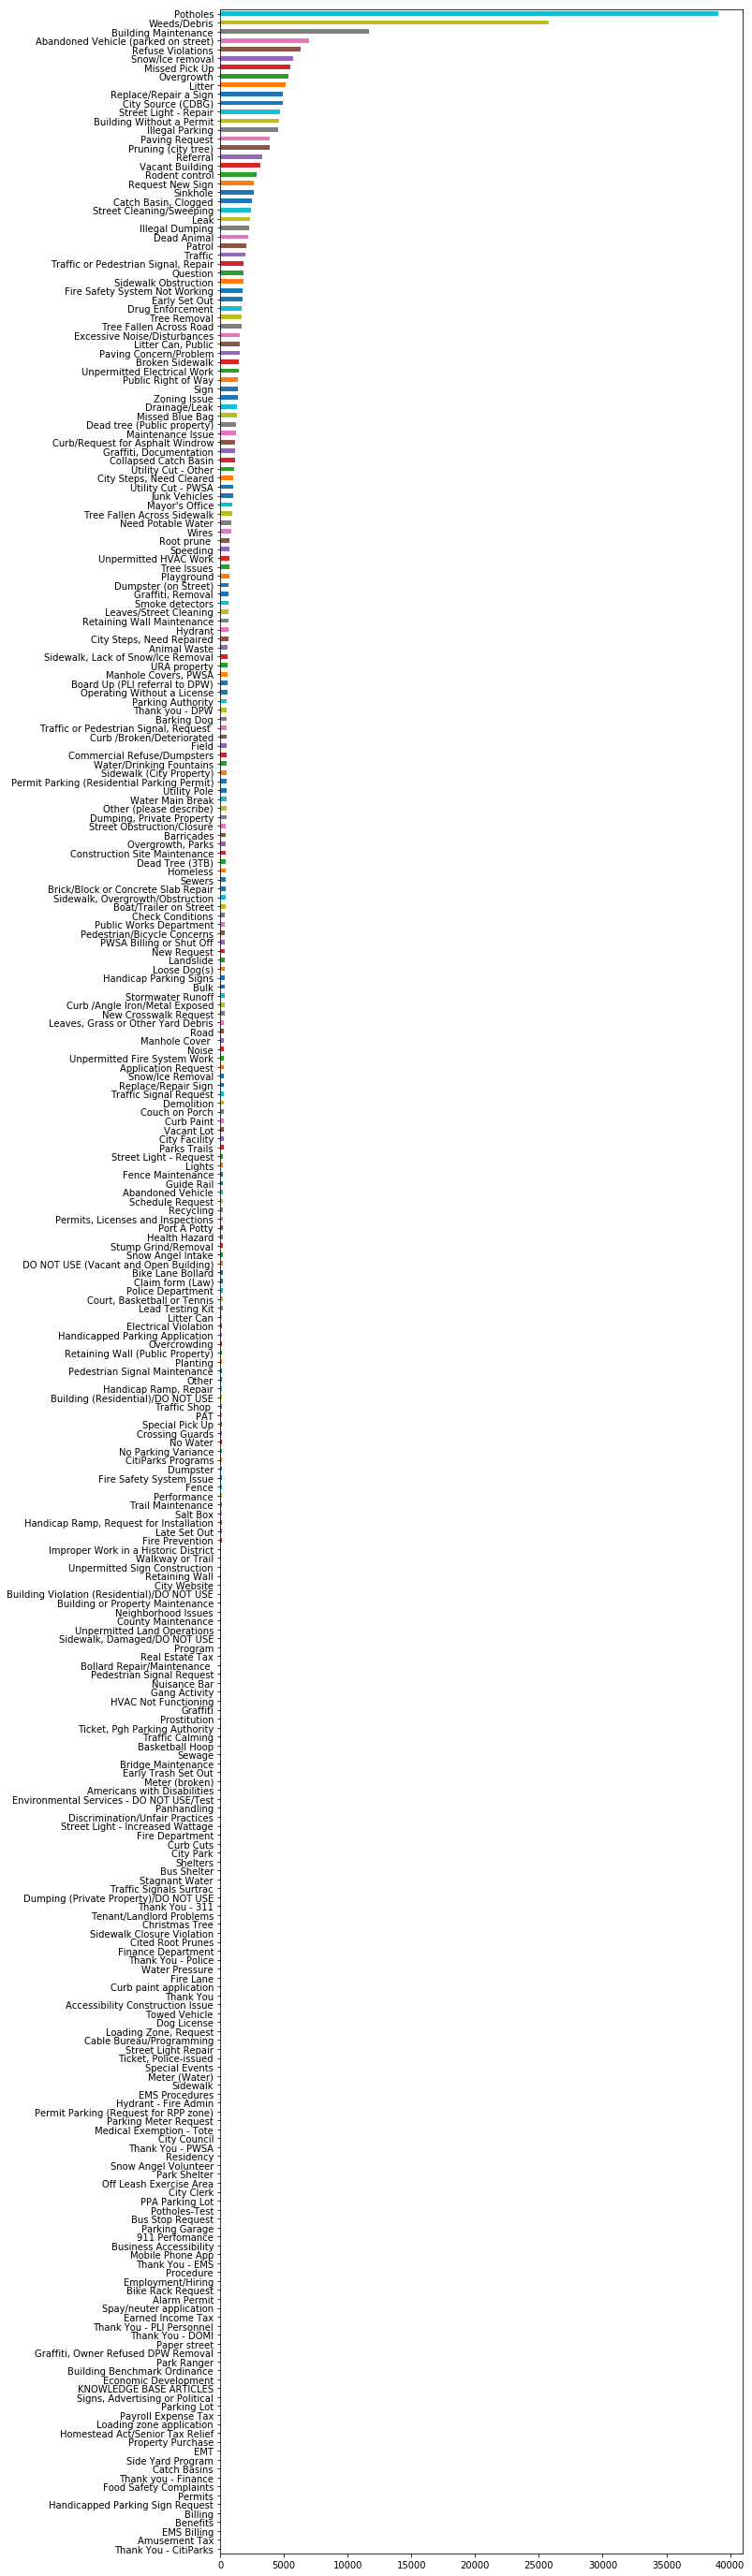

In [11]:
# make a HUGE horizontal bar chart so we can see the distribution of 311 complaints
# it took me a bunch of guesses to figure out the right figure size
pgh_311_data['REQUEST_TYPE'].value_counts(ascending=True).plot.barh(figsize=(10,50))

Sweet! But there are 284 different types of requests, this is not very useful. Fortunately the 311 data has a [code book](https://data.wprdc.org/dataset/311-data/resource/7794b313-33be-4a8b-bf80-41751a59b84a) that rolls the request types into a set of higher level categories. Note, the code book is a Microsoft Excel file so we got to use the `read_excel()` function instead of `read_csv()`.

In [12]:
# load the 311 data code book
url = "https://data.wprdc.org/dataset/a8f7a1c2-7d4d-4daa-bc30-b866855f0419/resource/7794b313-33be-4a8b-bf80-41751a59b84a/download/311-codebook-request-types.xlsx"
pgh_311_codes = pd.read_excel(url) # parse the excel sheet
pgh_311_codes.sample(10) # pull ten random rows

,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
85,Graffiti Issues,"Graffiti, Removal",NaN,DPW - 2nd Division,Block Level,NaN
115,Parks Issues,Parks Trails,NaN,DPW - Park Maintenance,Block Level,NaN
216,Utility Issues,Leak,NaN,Pittsburgh Water & Sewer Authority,Block Level,NaN
18,Ask Us/General FAQs,City Council,NaN,311,NaN,NaN
227,Weeds/Debris,City Park,NaN,DPW - Street Maintenance,Block Level,NaN
67,Construction Issues,Unpermitted Fire System Work,NaN,"Permits, Licenses and Inspections",Neighborhood,NaN
118,Parks Issues,Shelters,NaN,DPW - Park Maintenance,Block Level,NaN
191,Street Light,Street Light - Increased Wattage,NaN,DPW - Transportation & Engineering,Block Level,NaN
168,Road/Street Issues,Line Striping/Curb Painting (Maintenance Issue),NaN,DPW - Traffic,Block Level,NaN
3,Accessibility,"Handicap Ramp, Request for Installation",NaN,DPW - Transportation & Engineering,Block Level,NaN


So we loaded the codebook into a separate dataframe and if we look at it we can see how the `REQUEST_TYPE` from the data corresponds to `Issues` in the code book. Additionally, we can see how there is a higher level `Catagory` associated with each issue in the code book.

In [13]:
# find the row for "Potholes"
query = pgh_311_codes['Issue'] == 'Potholes'
pgh_311_codes[query]

,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
178,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN


In [14]:
# find the row for "Weeds/Debris"
query = pgh_311_codes['Issue'] == 'Weeds/Debris'
pgh_311_codes[query]

,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
96,Neighborhood Issues,Weeds/Debris,NaN,"Permits, Licenses and Inspections",Block Level,NaN


In [16]:
# find the row for "Building Maintenance
query = pgh_311_codes['Issue'] == 'Building Maintenance'
pgh_311_codes[query]

,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
27,Building Maintenance,Building Maintenance,NaN,"Permits, Licenses and Inspections",Neighborhood,NaN


If you look at the data you will notice that both "Weeds/Debris" and "Building Maintenance" belong to the same category of "Neighborhood Issues." Using this mapping we can hopefully make a bit more sense of the data.

Now what we need to do is `merge()` the data. We can look to the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) to provide some explaination about how use use this fuction to combine two datasets with overlapping columns with different names.

In our case what we want to do is *merge* the codebook into the 311 data and add a new column for the category.

In [17]:
# merge the two dataframes on the REQUEST_TYPE and ISSUE columns
pgh_311_data_merged = pgh_311_data.merge(pgh_311_codes, left_on="REQUEST_TYPE", right_on="Issue")
pgh_311_data_merged.sample(10)

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,...,FIRE_ZONE,X,Y,GEO_ACCURACY,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
150244,71719,159833,2017-06-06T16:46:00,"Litter Can, Public",Call Center,1,DPW - Street Maintenance,Friendship,9.0,8.0,...,3-23,-79.935060,40.461624,EXACT,Garbage and Litter Issues,"Litter Can, Public",NaN,DPW - Street Maintenance,Block Level,NaN
71358,192447,204600,2017-12-26T14:01:00,Building Without a Permit,Control Panel,1,"Permits, Licenses and Inspections",Perry South,6.0,25.0,...,1-10,-80.013481,40.461985,APPROXIMATE,Construction Issues,Building Without a Permit,NaN,"Permits, Licenses and Inspections",Neighborhood,Neighborhood
21909,164612,37667,2015-12-15T11:49:00,Potholes,Call Center,1,DPW - Street Maintenance,Brookline,4.0,19.0,...,4-26,-80.011601,40.400703,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
45772,243658,255950,2018-06-05T10:17:00,Curb/Request for Asphalt Windrow,Website,1,DPW - Street Maintenance,Duquesne Heights,2.0,20.0,...,4-1,-80.020109,40.430165,EXACT,Road/Street Issues,Curb/Request for Asphalt Windrow,NaN,DPW - Street Maintenance,Block Level,NaN
190688,179916,18050,2015-08-10T15:01:00,Overgrowth,Control Panel,1,DPW - Street Maintenance,West Oakland,6.0,5.0,...,2-10,-79.966243,40.442442,EXACT,Road/Street Issues,Overgrowth,NaN,DPW - Street Maintenance,Block Level,NaN
64455,206040,218215,2018-02-12T12:08:00,Snow/Ice removal,Call Center,1,DPW - Street Maintenance,Marshall-Shadeland,1.0,27.0,...,1-14,-80.025280,40.474977,EXACT,Road/Street Issues,Snow/Ice removal,NaN,DPW - Street Maintenance,Block Level,NaN
110471,54960,162405,2017-06-15T17:00:00,Leak,Call Center,1,Pittsburgh Water and Sewer Authority,Mount Washington,2.0,19.0,...,4-27,-80.014990,40.424983,EXACT,Building Maintenance,Leak,NaN,311/Pittsburgh Water & Sewer Authority,Neighborhood,NaN
198095,67876,163804,2017-06-21T10:52:00,Overgrowth,Call Center,1,DPW - Street Maintenance,Bedford Dwellings,6.0,5.0,...,2-1,-79.980213,40.447589,EXACT,Parks Issues,Overgrowth,NaN,DPW - Park Maintenance,Block Level,NaN
159016,118422,93026,2016-08-02T09:04:00,Litter,Call Center,1,DPW - Street Maintenance,Marshall-Shadeland,1.0,27.0,...,1-14,-80.027316,40.479698,EXACT,Garbage and Litter Issues,Litter,NaN,DPW - Street Maintenance,Block Level,NaN
184199,237223,249485,2018-05-17T09:34:00,Excessive Noise/Disturbances,Report2Gov iOS,0,Police - Zones 1-6,NaN,NaN,NaN,...,NaN,NaN,NaN,OUT_OF_BOUNDS,Neighborhood Issues,Excessive Noise/Disturbances,NaN,Police - Zones 1-6,Neighborhood,NaN


In [18]:
# count the numbers of unique values in the Category column
pgh_311_data_merged['Category'].value_counts()

Road/Street Issues                    78426
Neighborhood Issues                   33455
Garbage and Litter Issues             19187
Building Maintenance                  16770
Parks Issues                          13095
Parking                               12810
Tree Issues                            9781
Construction Issues                    8630
Public Safety                          8295
Animal Issues                          7511
Utility Issues                         6599
Street Light                           4973
Business Issues                        3433
City Facilities and Infrastructure     3335
Ask Us/General FAQs                    2011
Traffic and Street Sign Issues         1866
Graffiti Issues                        1861
Permits                                1703
Weeds/Debris                           1472
Accessibility                          1296
Pedestrian/Bicycle Concerns             575
Personnel (City)                        292
Communications (Cable, Website) 

This is a much more managably set of categorical values!

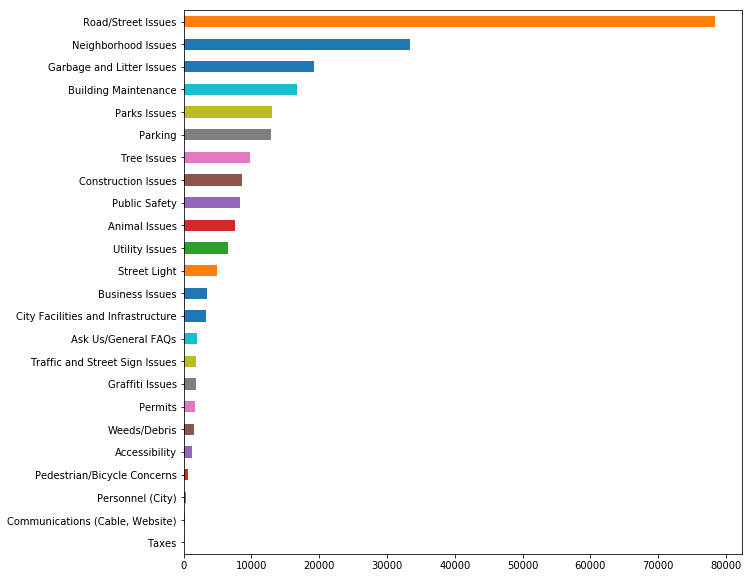

In [19]:
# make a bar chart of the categories for the merged data
pgh_311_data_merged['Category'].value_counts(ascending=True).plot.barh(figsize=(10,10))

Now we can dive into specific categories and find out more.

In [20]:
# create a query mask for rows where the Category is equal to the value "Road/Street Issues"
query = pgh_311_data_merged['Category'] == "Road/Street Issues"

# find the rows matching the query, select the Issue column and count the unique values 
pgh_311_data_merged[query]['Issue'].value_counts()

Potholes                            39036
Snow/Ice removal                     5704
Overgrowth                           5390
Replace/Repair a Sign                4941
Paving Request                       3887
Request New Sign                     2634
Sinkhole                             2610
Street Cleaning/Sweeping             2395
Traffic                              1996
Paving Concern/Problem               1508
Drainage/Leak                        1311
Curb/Request for Asphalt Windrow     1202
Utility Cut - Other                  1091
Leaves/Street Cleaning                651
Curb /Broken/Deteriorated             530
Street Obstruction/Closure            461
Barricades                            447
Landslide                             372
Curb /Angle Iron/Metal Exposed        340
New Crosswalk Request                 328
Traffic Signal Request                275
Guide Rail                            229
Port A Potty                          212
Litter Can                        

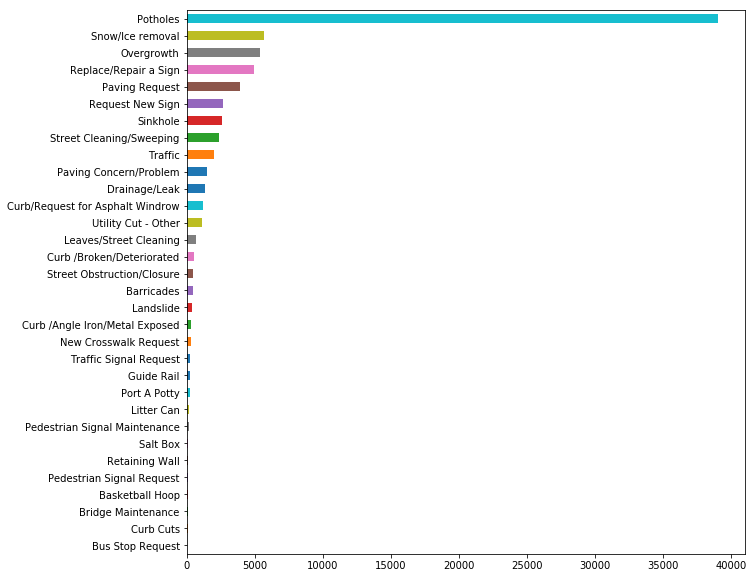

In [21]:
# create a query mask for rows where the Category is equal to the value "Road/Street Issues"
query = pgh_311_data_merged['Category'] == "Road/Street Issues"

# find the rows matching the query, select the Issue column and count the unique values and make a bar chart
pgh_311_data_merged[query]['Issue'].value_counts(ascending=True).plot.barh(figsize=(10,10))

Neat, but what is that `query` business I'm using??

## Querying Data

It is sometimes helpful to think of a Pandas Dataframe as a little database. There is data and information stored in the Pandas Dataframe (or Series) and you want to *retrieve* it. Information Retrieval! A classic library science topic.

Pandas has multiple mechanisms for getting specific bits of data and information from its data structures. The most common is to use *masking* to select just the rows you want. Masking is a two stage process, first you create a sequence of boolean values based upon a conditional expression--which you can think of as a "query"--and then you index your dataframe using that boolean sequence. 

Let's go back to the data I have above, what I want to do is select only the rows where the "Category" column is equal to the string "Road/Street Issues". The first step is to create my "mask" or boolean sequence of values that correspond to a conditional expression (like an `if` statement).

In [25]:
# Create a "mask" or list of True/False values based on a conditional expression
# if the value in the Category column is equal to "Road/Street Issues" then True, else False
query = pgh_311_data_merged['Category'] == "Road/Street Issues"
query.tail(300)

237332     True
237333     True
237334     True
237335     True
237336     True
237337     True
237338     True
237339     True
237340     True
237341     True
237342     True
237343     True
237344     True
237345     True
237346     True
237347     True
237348     True
237349    False
237350    False
237351    False
237352    False
237353    False
237354    False
237355    False
237356    False
237357    False
237358    False
237359    False
237360    False
237361    False
          ...  
237602    False
237603    False
237604    False
237605    False
237606    False
237607    False
237608    False
237609    False
237610    False
237611    False
237612    False
237613    False
237614    False
237615    False
237616    False
237617    False
237618    False
237619    False
237620    False
237621    False
237622    False
237623    False
237624    False
237625    False
237626    False
237627    False
237628    False
237629    False
237630    False
237631    False
Name: Category, Length: 

In [27]:
# look at a specific row
pgh_311_data_merged.iloc[237348:237350]

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,...,FIRE_ZONE,X,Y,GEO_ACCURACY,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
237348,48216,166966,2017-07-03T13:39:00,Retaining Wall,Text Message,1,DPW - Construction Division,South Side Slopes,3.0,17.0,...,4-24,-79.979835,40.424683,EXACT,Road/Street Issues,Retaining Wall,NaN,DPW - Construction Division,Block Level,NaN
237349,65745,150359,2017-05-03T10:45:00,City Clerk,Website,1,City Clerks Office,Lower Lawrenceville,7.0,6.0,...,3-3,-79.965383,40.466393,APPROXIMATE,Ask Us/General FAQs,City Clerk,NaN,City Clerks Office,NaN,NaN


The code above basically looped over every row in the dataframe and made a new list(technically a Series) of values True or False for each row in the Dataframe depending upon the condition (is the Category equal to "Road/Street Issues"). I like to think of this list as your "query" that you can pass to your dataframe in order to retrieve only those rows where the condition you specified is True.

In [30]:
# make a new dataframe of just the rows that match the query
road_street_issues = pgh_311_data_merged[query]
road_street_issues.sample(10)

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,...,FIRE_ZONE,X,Y,GEO_ACCURACY,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
152470,152859,16416,2015-07-30T14:06:00,Drainage/Leak,Call Center,1,DPW - Street Maintenance,Brookline,4.0,19.0,...,4-26,-80.018110,40.400365,EXACT,Road/Street Issues,Drainage/Leak,NaN,DPW - Street Maintenance,Block Level,NaN
215342,135354,85284,2016-07-05T15:45:00,Paving Request,Call Center,1,DOMI - Asphalt,Upper Lawrenceville,7.0,10.0,...,3-5,-79.945945,40.484856,EXACT,Road/Street Issues,Paving Request,NaN,DPW - Asphalt,Block Level,NaN
7283,50745,72913,2016-05-25T10:34:00,Potholes,Call Center,1,DPW - Street Maintenance,Highland Park,7.0,11.0,...,3-12,-79.908285,40.474227,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
1371,227912,240125,2018-04-17T12:34:00,Potholes,Call Center,1,DPW - Street Maintenance,Greenfield,5.0,15.0,...,2-12,-79.942691,40.419724,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
215481,129081,94684,2016-08-08T10:52:00,Paving Request,Call Center,1,DOMI - Asphalt,Lincoln Place,5.0,31.0,...,4-20,-79.902962,40.367023,EXACT,Road/Street Issues,Paving Request,NaN,DPW - Asphalt,Block Level,NaN
112588,87267,137835,2017-03-08T10:27:00,Replace/Repair a Sign,Call Center,1,DOMI - TrafficShop,Duquesne Heights,2.0,19.0,...,4-1,-80.024802,40.434164,EXACT,Road/Street Issues,Replace/Repair a Sign,NaN,DPW - Traffic,Block Level,NaN
25034,208457,220621,2018-02-16T10:51:00,Potholes,Website,1,DPW - Street Maintenance,Allegheny Center,1.0,22.0,...,1-6,-80.004606,40.452666,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
16159,247038,259332,2018-06-14T13:14:00,Potholes,Call Center,3,DPW - Street Maintenance,Central Oakland,3.0,4.0,...,2-11,-79.954819,40.437102,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
152663,236229,248493,2018-05-15T08:19:00,Utility Cut - Other,Call Center,0,DOMI - Permits,East Allegheny,1.0,23.0,...,1-5,-79.997101,40.457268,EXACT,Road/Street Issues,Utility Cut - Other,NaN,DPW - Permits,Block Level,NaN
15967,84729,140175,2017-03-20T18:30:00,Potholes,Call Center,1,DPW - Street Maintenance,Lincoln-Lemington-Belmar,9.0,12.0,...,3-18,-79.888794,40.470083,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN


Now we have a new dataframe that contains a subset of the `pgh_311_data_merged` dataframe with just the rows we are interested in.

In [31]:
# inspect the shape of the orginal and new dataframes
print(pgh_311_data_merged.shape)
print(road_street_issues.shape)

(237632, 24)
(78426, 24)


As we can see above, the `road_street_issues` dataframe has a lot fewer rows than `pgh_311_data_merged`, information retrieval FTW!

We aren't limited to a single conditional test when we are querying our data, we can combine them using Python's built in logical operators. For example, what if we only wanted rows for potholes in Bloomfield. 

In [32]:
# Create a query mask for potholes
query_potholes = pgh_311_data_merged['REQUEST_TYPE'] == "Potholes"
# Create a query mask for bloomfield
query_bloomfield = pgh_311_data_merged['NEIGHBORHOOD'] == "Bloomfield"

# create a new dataframe that queries potholes AND bloomfield
bloomfield_pothole_data = pgh_311_data_merged[query_potholes & query_bloomfield]
# inspect the new dataframe
print(bloomfield_pothole_data.shape)
bloomfield_pothole_data.head()

(1644, 24)


,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,...,FIRE_ZONE,X,Y,GEO_ACCURACY,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
53,119651,102553,2016-09-07T11:51:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7.0,8.0,...,3-1,-79.947530,40.460407,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
56,119652,101335,2016-08-31T15:29:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7.0,8.0,...,3-1,-79.949706,40.459838,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
101,233593,245829,2018-05-07T08:26:00,Potholes,Twitter,1,DPW - Street Maintenance,Bloomfield,7.0,10.0,...,3-23,-79.940024,40.464620,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
194,50909,176515,2017-08-04T10:10:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7.0,8.0,...,3-1,-79.940802,40.456283,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
232,113865,110329,2016-10-12T11:28:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7.0,8.0,...,3-23,-79.940138,40.458000,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN


Look at that! We now have a dataframe that only contains the rows for pothole complains in Bloomfield. I wonder what the distribution of bloomfield pothole complains is over time...

## Parsing Time

Often there is date/time data in one of the columns of your dataset. In this case `CREATED_ON` appears to be a date/time for when the 311 complaint was lodged. Unless you specify `parse_dates=True` when you call the read_csv, you will need to re-parse your date/time column into the correct datatype. 


For example, if we look at the datatypes for all of the columns in our potholes in Bloomfield dataset we can see been parsed as dates.

In [33]:
# inspect the datatypes for each column in the data
bloomfield_pothole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 53 to 39006
Data columns (total 24 columns):
_id                       1644 non-null int64
REQUEST_ID                1644 non-null int64
CREATED_ON                1644 non-null object
REQUEST_TYPE              1644 non-null object
REQUEST_ORIGIN            1644 non-null object
STATUS                    1644 non-null int64
DEPARTMENT                1644 non-null object
NEIGHBORHOOD              1644 non-null object
COUNCIL_DISTRICT          1644 non-null float64
WARD                      1644 non-null float64
TRACT                     1644 non-null float64
PUBLIC_WORKS_DIVISION     1644 non-null float64
PLI_DIVISION              1644 non-null float64
POLICE_ZONE               1644 non-null float64
FIRE_ZONE                 1644 non-null object
X                         1644 non-null float64
Y                         1644 non-null float64
GEO_ACCURACY              1644 non-null object
Category                  1644 non-null 

Let's fix that! First we parse the `CREATED_ON` column using the `to_datetime()` function. What this does is loop over every value in the column and convert it to a datetime data type. 


**Important Note**: Even though we just want to look the potholes for Bloomfield, we need to do this operation on the full data, not the subselection of potholes in Bloomfield. Why? It has to do with the way Pandas manages the data behind the scenes, our `bloomfield_pothole_data` is actually a *view* into the larger dataframe, `pgh_311_data_merged`. This means we should change the original data because then we'll see it reflected in our bloomfield/potholes subset. Changing the originaly data as opposed to our subset is also good practice because we might want to look at the temporal distribution for other types of 311 request or other neighborhoods.

In [34]:
# replace the CREATED_ON column with parsed dates
pgh_311_data_merged['CREATED_ON'] = pd.to_datetime(pgh_311_data_merged['CREATED_ON'])
pgh_311_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237632 entries, 0 to 237631
Data columns (total 24 columns):
_id                       237632 non-null int64
REQUEST_ID                237632 non-null int64
CREATED_ON                237632 non-null datetime64[ns]
REQUEST_TYPE              237632 non-null object
REQUEST_ORIGIN            237632 non-null object
STATUS                    237632 non-null int64
DEPARTMENT                237598 non-null object
NEIGHBORHOOD              221462 non-null object
COUNCIL_DISTRICT          221860 non-null float64
WARD                      221575 non-null float64
TRACT                     222644 non-null float64
PUBLIC_WORKS_DIVISION     221580 non-null float64
PLI_DIVISION              221575 non-null float64
POLICE_ZONE               221386 non-null float64
FIRE_ZONE                 221691 non-null object
X                         225061 non-null float64
Y                         225061 non-null float64
GEO_ACCURACY              237632 non-null o

Sweet, now that Pandas is aware of dates we can start doing operations on that data.

In [36]:
# ReCreate a query mask for potholes
query_potholes = pgh_311_data_merged['REQUEST_TYPE'] == "Potholes"
# Create a query mask for bloomfield
query_bloomfield = pgh_311_data_merged['NEIGHBORHOOD'] == "Bloomfield"

# create a new dataframe that queries potholes AND bloomfield
bloomfield_pothole_data = pgh_311_data_merged[query_potholes & query_bloomfield]
# inspect the new dataframe
print(bloomfield_pothole_data.shape)
bloomfield_pothole_data.head()

(1644, 24)


,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,...,FIRE_ZONE,X,Y,GEO_ACCURACY,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
53,119651,102553,2016-09-07 11:51:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7.0,8.0,...,3-1,-79.947530,40.460407,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
56,119652,101335,2016-08-31 15:29:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7.0,8.0,...,3-1,-79.949706,40.459838,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
101,233593,245829,2018-05-07 08:26:00,Potholes,Twitter,1,DPW - Street Maintenance,Bloomfield,7.0,10.0,...,3-23,-79.940024,40.464620,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
194,50909,176515,2017-08-04 10:10:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7.0,8.0,...,3-1,-79.940802,40.456283,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN
232,113865,110329,2016-10-12 11:28:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7.0,8.0,...,3-23,-79.940138,40.458000,EXACT,Road/Street Issues,Potholes,NaN,DPW - Street Maintenance,Block Level,NaN


In [37]:
# notice the datatype has changed in our subset of the data
bloomfield_pothole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 53 to 39006
Data columns (total 24 columns):
_id                       1644 non-null int64
REQUEST_ID                1644 non-null int64
CREATED_ON                1644 non-null datetime64[ns]
REQUEST_TYPE              1644 non-null object
REQUEST_ORIGIN            1644 non-null object
STATUS                    1644 non-null int64
DEPARTMENT                1644 non-null object
NEIGHBORHOOD              1644 non-null object
COUNCIL_DISTRICT          1644 non-null float64
WARD                      1644 non-null float64
TRACT                     1644 non-null float64
PUBLIC_WORKS_DIVISION     1644 non-null float64
PLI_DIVISION              1644 non-null float64
POLICE_ZONE               1644 non-null float64
FIRE_ZONE                 1644 non-null object
X                         1644 non-null float64
Y                         1644 non-null float64
GEO_ACCURACY              1644 non-null object
Category                  1644 n

In [39]:
# make a temporal index by setting it equal to CREATED_ON
bloomfield_pothole_data.index = bloomfield_pothole_data['CREATED_ON']
bloomfield_pothole_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1644 entries, 2016-09-07 11:51:00 to 2018-02-20 09:26:00
Data columns (total 24 columns):
_id                       1644 non-null int64
REQUEST_ID                1644 non-null int64
CREATED_ON                1644 non-null datetime64[ns]
REQUEST_TYPE              1644 non-null object
REQUEST_ORIGIN            1644 non-null object
STATUS                    1644 non-null int64
DEPARTMENT                1644 non-null object
NEIGHBORHOOD              1644 non-null object
COUNCIL_DISTRICT          1644 non-null float64
WARD                      1644 non-null float64
TRACT                     1644 non-null float64
PUBLIC_WORKS_DIVISION     1644 non-null float64
PLI_DIVISION              1644 non-null float64
POLICE_ZONE               1644 non-null float64
FIRE_ZONE                 1644 non-null object
X                         1644 non-null float64
Y                         1644 non-null float64
GEO_ACCURACY              1644 non-null objec

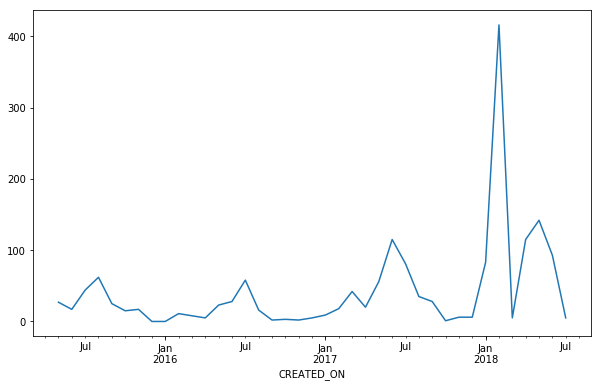

In [44]:
# Resample (grouping) by month ("M") and counting the number of complaints
bloomfield_pothole_data['REQUEST_ID'].resample("M").count().plot(figsize=(10,6))

It looks like Bloomfield had a MASSIVE spike in pothole complaints this past winter. You can see there is a pattern, it is lowest right before the new year and then it springs in the spring and then it falls again in the fall.

## Pivoting Data

Let's look at one of the most exciting datasets in the WPRDC, the [Daily Community Center Attendance records](https://data.wprdc.org/dataset/daily-community-center-attendance)! WOWOW!

In [45]:
data_url = "https://data.wprdc.org/datastore/dump/b7cb30c8-b179-43ff-8655-f24880b0f578"

# load data and read in the date column as the row index
data = pd.read_csv(data_url, index_col="date", parse_dates=True)
data = data.drop(columns="_id") 
data.head()

,center_name,attendance_count
date,,
2018-06-08,Ormsby Community Center,10
2018-06-08,Paulson Community Center,19
2018-06-08,Phillips Community Center,107
2018-06-08,Ammon Community Center,81
2018-06-08,Brookline Community Center,33


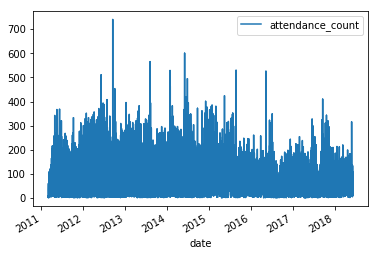

In [46]:
# What does the data look like?
data.plot()

We can pivot the data so the center names are columns and each row is the number of people attending that community center per day. This is basically rotating the data.

In [47]:
# Use the pivot function to make column values into columns
data.pivot(columns="center_name", values="attendance_count").head()

center_name,Ammon / Josh Gibson Field,Ammon Community Center,Ammon Pool,Arlington Community Center,Arlington Field (Playground),Brookline Community Center,Dan Marino Field (Playground),Frick Environmental Center,Gladstone Field,Highland Pool,...,Paulson Community Center,Paulson Field,Phillips Community Center,Phillips Park Field,Schenley Ice Rink,Warrington Community Center,Warrington Field,West Penn Community Center,West Penn Fields,West Penn Pool
date,,,,,,,,,,,,,,,,,,,,,
2011-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN
2011-03-08,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2011-03-09,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-10,NaN,1.0,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,32.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN
2011-03-11,NaN,19.0,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,...,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data.head(10)

,center_name,attendance_count
date,,
2018-06-08,Ormsby Community Center,10
2018-06-08,Paulson Community Center,19
2018-06-08,Phillips Community Center,107
2018-06-08,Ammon Community Center,81
2018-06-08,Brookline Community Center,33
2018-06-08,Jefferson Community Center,29
2018-06-08,Warrington Community Center,15
2018-06-08,West Penn Community Center,54
2018-06-07,Phillips Community Center,77


That is a lot of NaN, and not the tasty garlicy kind either.

We might want to break this apart for each Community Center. We can start by inspecting the number rows per center.

In [49]:
# count the number of rows per center
data.groupby("center_name").count()

,attendance_count
center_name,
Ammon / Josh Gibson Field,1
Ammon Community Center,1825
Ammon Pool,3
Arlington Community Center,1331
Arlington Field (Playground),1
Brookline Community Center,2159
Dan Marino Field (Playground),1
Frick Environmental Center,1
Gladstone Field,5


There are a lot of community centers that don't have a lot of numbers because either 1) they are not very popular or 2) they don't report their daily attendance (more likely given how man NaNs we saw above).

What we will do is create a custom filter function that we will apply to ever row in the dataframe using the [groupby filter function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.filter.html). This is some knarly stuff we are doing here. This isn't the plain old filter function, this is a special filter fuction (part of the groupby functionality) that requires you to create a special function to apply to each row. In our case we will make a little function that takes a value and tests to see if it is create than a threshold value (in our case 1000). 

In [52]:
# create a function we will use to perform a filtering 
# operation on the data
# filter out centers that have less then 1000 total entries
def filter_less_than(x, threshold):
    #print(x)
    if len(x) > threshold:
        return True
    else:
        return False

    
# def filter_less_than(x):
#     if len(x) > 1000:
#         return True
#     else:
#         return False

# use the custom function to filter out rows
popular_centers = data.groupby("center_name").filter(filter_less_than, 
                                                     threshold=1000)
# look at what centers are in the data now
popular_centers.groupby("center_name").count()

,attendance_count
center_name,
Ammon Community Center,1825
Arlington Community Center,1331
Brookline Community Center,2159
Jefferson Community Center,1701
Magee Community Center,1800
Ormsby Community Center,1990
Paulson Community Center,1547
Phillips Community Center,2116
Warrington Community Center,1714


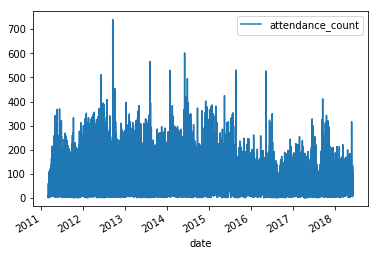

In [54]:
# plot the popular community centers
popular_centers.plot()

In [55]:
# Use the pivot function to make rows into columns with only the popular community centers
pivoted_data = popular_centers.pivot(columns="center_name", values="attendance_count")
pivoted_data.head()

center_name,Ammon Community Center,Arlington Community Center,Brookline Community Center,Jefferson Community Center,Magee Community Center,Ormsby Community Center,Paulson Community Center,Phillips Community Center,Warrington Community Center,West Penn Community Center
date,,,,,,,,,,
2011-03-07,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.0,2.0
2011-03-08,NaN,NaN,22.0,NaN,32.0,NaN,NaN,NaN,NaN,3.0
2011-03-09,NaN,NaN,60.0,NaN,37.0,NaN,NaN,13.0,NaN,NaN
2011-03-10,1.0,NaN,54.0,23.0,60.0,5.0,NaN,32.0,2.0,1.0
2011-03-11,19.0,NaN,77.0,12.0,38.0,38.0,5.0,12.0,NaN,NaN


Still NaN-y, but not as bad. Now lets see what these data look like.

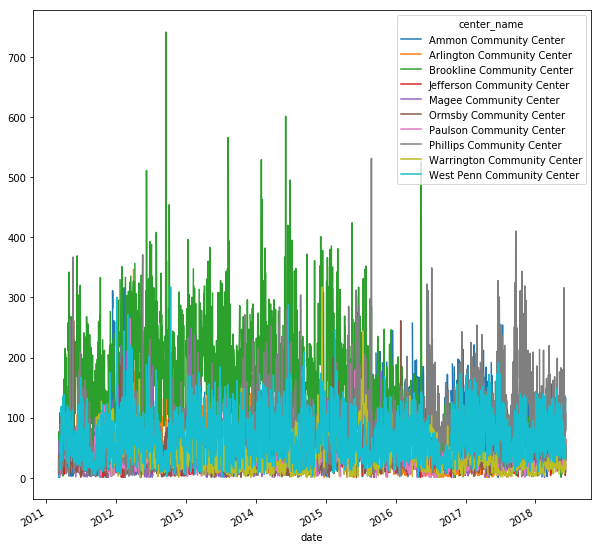

In [56]:
# plot the data
pivoted_data.plot(figsize=(10,10))

Look at the [cumulative sum](http://www.variation.com/cpa/help/hs108.htm) to see if the attendance is above or below average. 

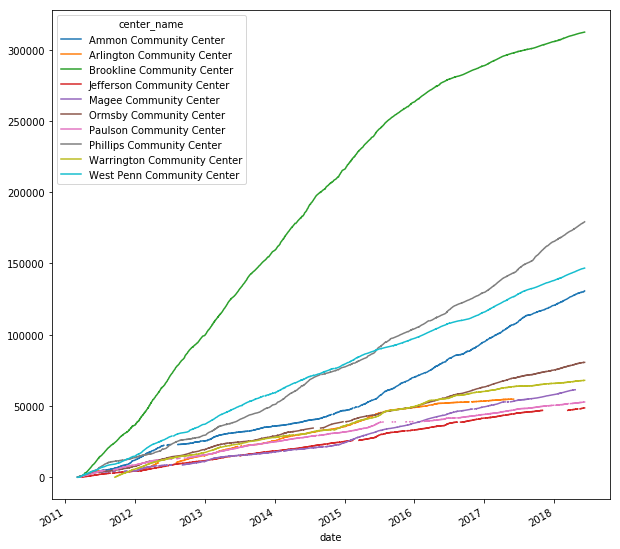

In [57]:
# compute the cumulative sum for every column and make a chart
pivoted_data.cumsum().plot(figsize=(10,10))

Looks like Brookline is the winner here, but attendance has tapered off in the past couple years.

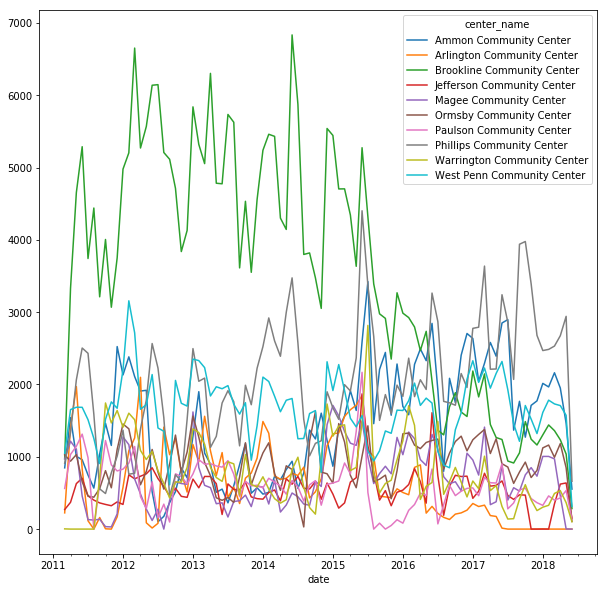

In [58]:
# Resample and compute the monthly totals for the popular community centers
pivoted_data.resample("M").sum().plot(figsize=(10,10))

Looks like monthly is too messy, maybe by year?

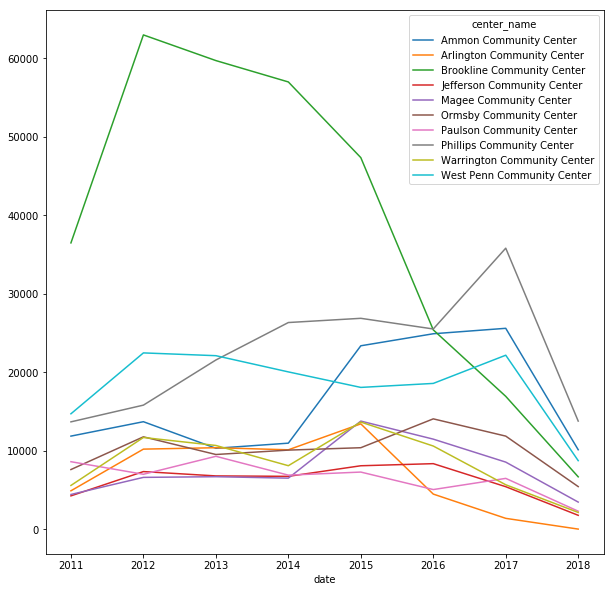

In [59]:
# yearly resample to monthly, compute the totals, and plot
pivoted_data.resample("Y").sum().plot(figsize=(10,10))

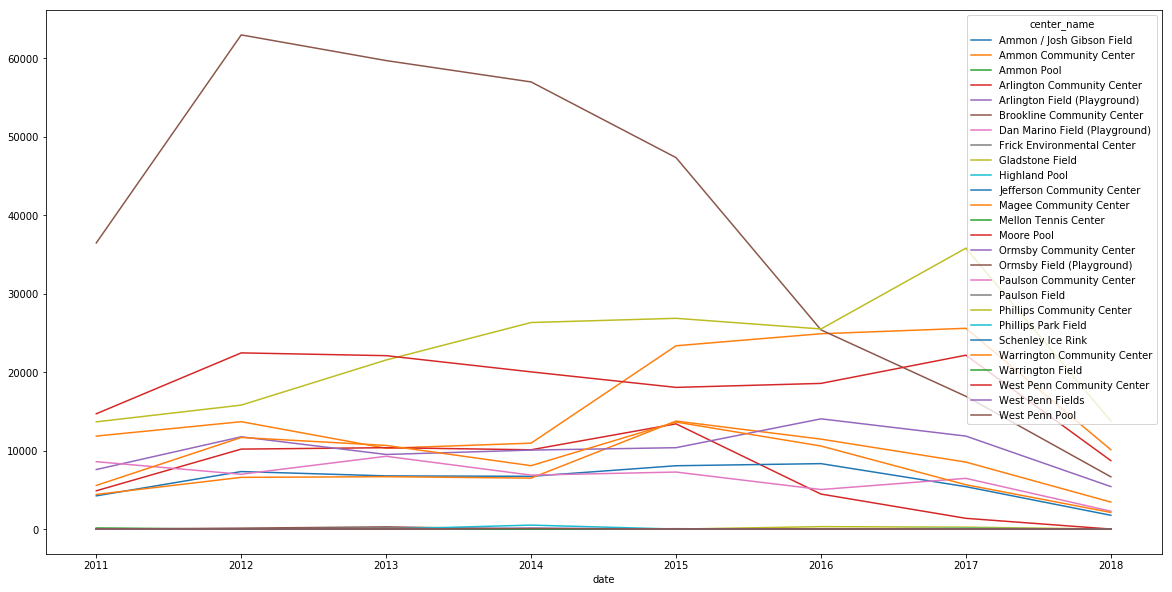

In [62]:
data.pivot(columns="center_name", values="attendance_count").resample("Y").sum().plot(figsize=(20,10))

Looking at the total number of attendance per year per popular community center gives us a bit more information.

## City of Pittsburgh Trees

![](http://i0.kym-cdn.com/photos/images/newsfeed/001/296/855/bff.png)

I am the Data and I speak for the [trees](https://data.wprdc.org/dataset/city-trees).

In [63]:
# Load the tree data
data_url = "https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da"
pgh_tree_data = pd.read_csv(data_url, low_memory=False)
pgh_tree_data.head()

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,41618,1895025857,201.0,EAST END AVE,Vacant Site Medium,Vacant Site Medium,NaN,NaN,NaN,NaN,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.445645,-79.894070
1,35467,1982160355,NaN,NaN,Sweetgum: American,Liquidambar styraciflua,0.0,0.0,0.0,0.0,...,Highland Park,7.0,11.0,42003980100,2.0,11.0,5.0,3-9,40.480082,-79.916980
2,35468,1590028952,3718.0,BUTLER ST,Maple: Red,Acer rubrum,18.0,8.0,10.0,3.0,...,Lower Lawrenceville,7.0,6.0,42003060300,2.0,6.0,2.0,3-3,40.466702,-79.964152
3,41404,1493306585,1302.0,W NORTH AVE,Vacant Site Small,Vacant Site Small,NaN,NaN,NaN,NaN,...,Manchester,6.0,21.0,42003210700,1.0,21.0,1.0,1-8,40.452523,-80.024391
4,35470,1277612232,NaN,NaN,Ginkgo,Ginkgo biloba,0.0,0.0,0.0,0.0,...,Highland Park,7.0,11.0,42003980100,2.0,11.0,5.0,3-9,40.479993,-79.917217


In [64]:
# inspect the tree data
pgh_tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45300 entries, 0 to 45299
Data columns (total 59 columns):
_id                                          45300 non-null int64
id                                           45300 non-null int64
address_number                               37528 non-null float64
street                                       37527 non-null object
common_name                                  45298 non-null object
scientific_name                              45298 non-null object
height                                       41820 non-null float64
width                                        41814 non-null float64
growth_space_length                          41816 non-null float64
growth_space_width                           41818 non-null float64
growth_space_type                            45288 non-null object
diameter_base_height                         41822 non-null float64
stems                                        45298 non-null float64
overhead_utilit

In [65]:
# count the number of trees based on their common name
pgh_tree_data["common_name"].value_counts()

Maple: Norway               3784
Maple: Red                  3432
Pear: Callery               3107
London planetree            3032
Linden: Littleleaf          2533
Honeylocust: Thornless      2253
Vacant Site Small           2174
Oak: Pin                    1783
Ginkgo                      1351
Crabapple: Flowering        1302
Stump                        963
Maple: Freeman               913
Oak: Northern Red            908
Sweetgum: American           888
Elm: American                823
Maple: Sugar                 794
Locust: Black                750
Vacant Site Not Suitable     650
Zelkova: Japanese            630
Maple: Hedge                 615
Vacant Site Large            604
Cherry/Plum: spp.            560
Lilac: Japanese Tree         547
Spruce: Colorado             519
Maple: Silver                450
Hawthorn: spp.               425
Mulberry: White              403
Vacant Site Medium           344
Elm: spp.                    327
Horsechestnut                311
          

So lets see how many maple trees are in pittsburgh.

In [66]:
# create a query mask for rows where the tree's common name contains the string "Maple"
query_maples = pgh_tree_data["common_name"].str.contains("Maple", na=False)
pgh_tree_data[query_maples]['common_name'].value_counts()

Maple: Norway         3784
Maple: Red            3432
Maple: Freeman         913
Maple: Sugar           794
Maple: Hedge           615
Maple: Silver          450
Maple: Japanese        151
Maple: Miyabei         145
Maple: Amur            100
Maple: Tatarian         79
Maple: Paperbark        44
Maple: Sycamore         43
Maple: Black            11
Maple: Truncatum x       8
Maple: Trident           2
Maple: Striped           2
Maple: spp.              2
Name: common_name, dtype: int64

Maple syrup is most often created from sugar maple, red maple, or black maple.([1](https://en.wikipedia.org/wiki/Maple_syrup))

In Class Demonstration: Can we compute the potential maple syrup the city could theoretically produce?